In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
Path = os.getcwd()

In [4]:
Resistor = .97369        #KiloOhms
len_resistor = 8.5       #cm
len_wire = 31.5          #cm

#These are the voltages and frequencies required to find the resistance of the wire
Va1 = np.array([0.5417, 0.5422, 0.5432, 0.5435, 0.5408])                  #Volts
Vb1 = np.array([7.82e-6, 7.83e-6, 7.82e-6, 7.84e-6, 7.80e-6])             #MicroVolts
freq1 = np.array([1013, 750, 500, 250, 100])                              #Hertz
error1 = np.array([1.53e-2, 1.327e-2, 1.47e-2, 1.287e-2, 1.04e-2])
#errorf = np.array([20,20,20,20,20])

#These are the voltages and frequencies required to find the inductance of the wire
Va2 = np.array([0.542, 0.543, 0.54, 0.538, 0.537, 0.536])                    #Volts
Vb2 = np.array([5.84e-6, 22.22e-6, 46.5e-6, 68.34e-6, 90.9e-6, 113.6e-6])    #MicroVolts
freq2 = np.array([5, 20, 40, 60, 80, 100])     #KiloHertz
error2 = np.array([0.3,0.3,0.3,0.3,0.3,0.3])

To find $R_2$ we can use this equation:

$R_2 = R_1\frac{V_b}{V_a}$

In [5]:
R2 = []

for i in range(len(Va1)):
    R2.append((Resistor * Vb1[i]/Va1[i])*1000000)
    
R2

[14.05622263245339,
 14.061218554039101,
 14.017407584683356,
 14.045500643974242,
 14.043605769230771]

In [6]:
np.mean(R2)

14.044791036876171

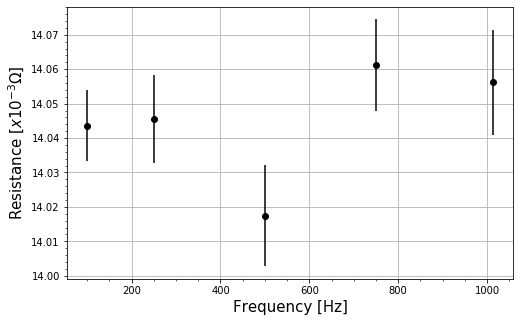

In [7]:
plt.figure(figsize = [8,5])
plt.errorbar(freq1,R2,yerr = error1,fmt='o', color = 'black')
plt.grid()
plt.xlabel("Frequency [Hz]", size = 15)
plt.ylabel("Resistance [$x10^{-3} \Omega$]", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/Resistance plot",bbox_inches='tight')
plt.show()

Now we can plot $R_1\frac{V_b}{V_a}$ as a function of frequency to find the slope, which would be our inductance.

In [8]:
Reactance = []

for i in range(len(Vb2)):
    Reactance.append((Resistor * Vb2[i]/Va2[i])*1000)
    
Reactance

[0.010491419926199261,
 0.03984418379373849,
 0.08384552777777778,
 0.12368396765799256,
 0.16482015083798884,
 0.20636414925373134]

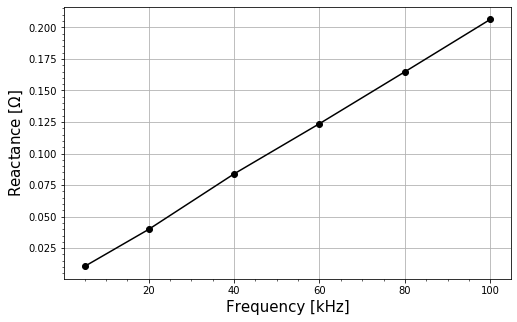

In [9]:
plt.figure(figsize = [8,5])
plt.plot(freq2,Reactance,'o-',color = 'black')
plt.grid()
plt.xlabel("Frequency [kHz]", size = 15)
plt.ylabel("Reactance [$\Omega$]", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/Inductance plot",bbox_inches='tight')
plt.show()

Now finding the slope and intercept

In [10]:
slope, intercept = np.polyfit(freq2,Reactance, 1)

slope,intercept  #Units: Ohm/KiloHertz

(0.002065617760014988, -0.0001606695928572151)

In [11]:
#These are the voltages and frequencies required to find the inductance of the wire
Va2 = np.array([0.542, 0.543, 0.54, 0.538, 0.537, 0.536])                    #Volts
Vb2 = np.array([5.84e-6, 22.22e-6, 46.5e-6, 68.34e-6, 90.9e-6, 113.6e-6])    #MicroVolts
freq2 = np.array([5, 20, 40, 60, 80, 100])     #KiloHertz

#now we must find the reactance of the wire
Reactance = []

for i in range(len(Vb2)):
    Reactance.append((Resistor * Vb2[i]/Va2[i])*1000)

#Now finding the residuals of the reactance
slope, intercept = np.polyfit(freq2,Reactance, 1)

expected = []
residuals = []
for i in range(len(freq2)):
    expected.append(freq2[i]* slope + intercept)
    residuals.append((expected[i]-Reactance[i])* 1000) 
print(residuals)

[-0.32400071898153715,
 1.307501813704051,
 -1.38148697003547,
 0.09242835004952266,
 0.26860037035297823,
 0.03695715491025542]

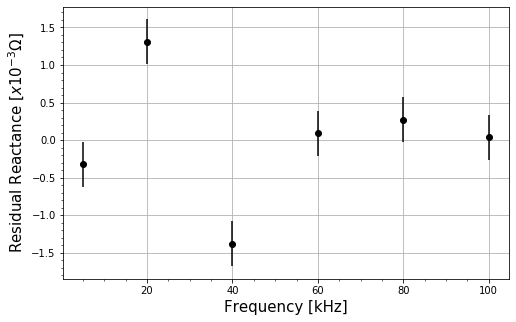

In [17]:
plt.figure(figsize = [8,5])
plt.errorbar(freq2,residuals,yerr=error2,fmt ='o',color = 'black')
plt.grid()
plt.xlabel("Frequency [kHz]", size = 15)
plt.ylabel("Residual Reactance [$x10^{-3} \Omega$]", size = 15)
plt.minorticks_on()
plt.savefig(Path + "/Residuals plot",bbox_inches='tight')
plt.show()